/Users/joergstihler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


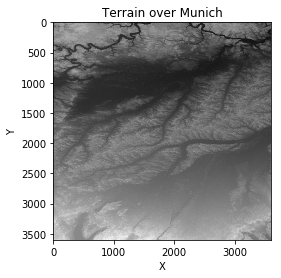

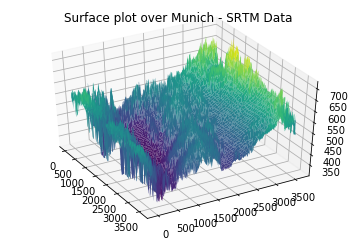

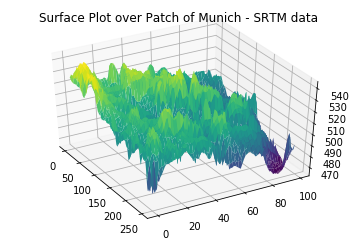

In [2]:
#import various packages
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np 
from random import random, seed
from sklearn.linear_model import LinearRegression
from scipy.misc import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from random import random, seed

#retrieve the terrain data and plot a patch

def surface_plot(surface,title):
    M,N = surface.shape

    ax_rows = np.arange(M)
    ax_cols = np.arange(N)

    [X,Y] = np.meshgrid(ax_cols, ax_rows)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(elev=40,azim=-30)
    ax.plot_surface(X,Y,surface,cmap=cm.viridis,linewidth=0)
    plt.title(title)

if __name__ == '__main__':

    # Load the terrain
    terrain1 = imread('SRTM_data_munich.tif')

    # Show the terrain
    plt.figure()
    plt.title('Terrain over Munich')
    plt.imshow(terrain1, cmap='gray')
    plt.xlabel('X')
    plt.ylabel('Y')

    surface_plot(terrain1,'Surface plot over Munich - SRTM Data')
   
    
    plt.show()

    # Extract a smaller patch of the terrain
    row_start = 1950
    row_end = 2050

    col_start = 1200
    col_end = 1450

    terrain1_patch = terrain1[row_start:row_end, col_start:col_end]

    surface_plot(terrain1_patch,'Surface Plot over Patch of Munich - SRTM data')
    

    plt.show()

    # Perform a OLS fitting using the whole axis pf the terrain data
    num_rows, num_cols = terrain1_patch.shape

    rows = np.arange(num_rows)
    cols = np.arange(num_cols)

    [C,R] = np.meshgrid(cols,rows)

    x = C.reshape(-1,1)
    y = R.reshape(-1,1)
    z = terrain1_patch.flatten()

Creating functions for the task:

In [3]:
# function calculating the mean value of a given dataset (equivalent to the integrated mean function)

def samplemean(z):
    #input  : given outcome of experiment
    #output : mean value  
    length = len(z)
    samplemeann = 0
    for k in range(0,length):
        samplemeann = samplemeann+z[k]
        
    samplemeann = (1.0/len(z))*samplemeann
    return samplemeann

In [4]:
# function that creates the designmatrix for two given input features

def designmatrix(x,y,degree):            
    #input1 : x-vector
    #input2 : y-vector
    #input3 : degree of polynomial for fit
    #output : Matrix X as defined in the lecture (in this particular case: up to degree 9 and mixed terms)
    
    lengthx = len(x)
    
    
    
    if degree == 9:
        X = np.c_[np.ones((lengthx,1)),x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3, \
                  x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                  x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5, \
                  x**6, x**5*y, x**4*y**2, x**3*y**3,x**2*y**4,x*y**5,y**6, \
                  x**7, x**6*y, x**5*y**2, x**4*y**3,x**3*y**4,x**2*y**5,x*y**6,y**7, \
                  x**8, x**7*y, x**6*y**2, x**5*y**3,x**4*y**4,x**3*y**5,x**2*y**6,x*y**7,y**8, \
                  x**9, x**8*y, x**7*y**2, x**6*y**3,x**5*y**4,x**4*y**5,x**3*y**6,x**2*y**7,x*y**8,y**9]
    
    if degree == 7:
        X = np.c_[np.ones((lengthx,1)),x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3, \
                  x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                  x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5, \
                  x**6, x**5*y, x**4*y**2, x**3*y**3,x**2*y**4,x*y**5,y**6, \
                  x**7, x**6*y, x**5*y**2, x**4*y**3,x**3*y**4,x**2*y**5,x*y**6,y**7]
    
    if degree == 5:
        X = np.c_[np.ones((lengthx,1)),x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3, \
                  x**4, x**3*y, x**2*y**2, x*y**3,y**4, \
                  x**5, x**4*y, x**3*y**2, x**2*y**3,x*y**4, y**5]
            
    
    if degree == 4:
        X = np.c_[np.ones((lengthx,1)),x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3, \
                  x**4, x**3*y, x**2*y**2, x*y**3,y**4]
           
            
    if degree == 3:
         X = np.c_[np.ones((lengthx,1)),x,y,x**2,x*y,y**2, \
                  x**3, x**2*y, x*y**2, y**3]
                
            
    if degree == 2:
        X = np.c_[np.ones((lengthx,1)),x,y,x**2,x*y,y**2]
            
           
    return X

In [5]:
# function that finds the coefficients of the regression with matrix inversion

def betareg(x,y,z,degree):             
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given observed data z
    #input4 : degree of polynomial for fit
    #output : coefficients for polynomial fit
   
    X = designmatrix(x,y,degree)
    
    # Calculation of beta
    XtX = np.transpose(X).dot(X)
    XtXinvers = np.linalg.inv(XtX)
    betareg = (XtXinvers.dot(np.transpose(X))).dot(z)   #our coefficients for the Regression

    return betareg 

In [6]:
# function that predicts target values based on a model fitted to inputs x&y and true values z

def zpredict_f(x,y,z,degree):          
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given observed data z
    #input4 : degree of polynomial for fit
    #output : predicted values with linear regression coefficients calculated with x,y
    
    X = designmatrix(x,y,degree)
    beta=betareg(x,y,z,degree)
    
    zpredict = X.dot(beta)

    
    return zpredict


In [7]:
# function calculating the mean squared error 

def MSE(z,zpredict):
    #input1 : given outcome
    #input2 : predicted outcome
    #output : Mean Squared Error
    length = len(z)
    MSE = 0
    for j in range(0,length) :
        term = (z[j]-zpredict[j])**2
        MSE = MSE + term
    MSE = (1.0/length*MSE)
    return MSE


# function that calculates an unbiased estimate of the variance according to Hastie et al. formula (3.8) p.47

def estvar(x,y,z,degree):                          
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given outcome of experiment
    #input4 : degree of polynomial for fit
    #output : estimated variance
    p = np.array([6,10,15,21])
    p = p[degree-2]
    length = len(z)
    zpredictdeg = zpredict_f(x,y,z,degree)
    estvar = 0
    for k in range(0,length):
        estvar = estvar + (z[k]-zpredictdeg[k])**2
    estvar=(1.0/(length-p-1))*estvar
    return estvar

# function calculating the R^2 score

def R2score(z,zpredict):     
    #input1: given outcome of experiment
    #input2: predicted outcome of experiment
    #output: R2 score
    
    lengthz = len(z)
    sum1=0
    for k in range(0,lengthz):
        sum1=sum1+(z[k]-samplemean(z))**2
    
    R2score = 1 - ((MSE(z,zpredict)*lengthz)/(sum1))
    return R2score

# function calculating the variance of the parameters beta

def betavariance(x,y,z,degree):
    #input1 : x-vector
    #input2 : y-vector
    #input3 : given observed data z
    #input4 : degree of polynomial for fit
    #output : vector of variances for beta
    
    X = designmatrix(x,y,degree)
    XtX = np.transpose(X).dot(X)
    XtXinvers = np.linalg.inv(XtX)
    var = estvar(x,y,z,degree)
    betavariance=betareg(x,y,z,degree)
    lengthb=len(betavariance)
    XTXinversvar=var*XtXinvers
    for k in range(0,lengthb):
        betavariance[k]=XTXinversvar[k][k]
    
    return betavariance

In [8]:
# function calculating the confidence intervals around reg. coefficients with lower bound, coefficients and upper bound

def confidence_int(beta,betavar,zalpha):
    #input1 : regression coefficients beta
    #input2 : variance of beta as in function betavariance
    #input3 : z-score and alpha for 1-2alpha confidence interval of the form z^(1-alpha)
    #output : matrix with confidence intervals 
    lengthb=len(beta)
    conf_int=np.zeros([3,lengthb])
    conf_int[1,:]=beta
    conf_int[0,:]=beta-zalpha*np.sqrt(betavar)
    conf_int[2,:]=beta+zalpha*np.sqrt(betavar)
    
    return conf_int
    
    
    
    
    

In [9]:
# Warning! : the next cell takes very long to calculate, it may be of interest to skip it

In [10]:
# Overview of MSE and R2-score for 2nd to 5th order polynomial fits
# Including confidence intervals for parameter beta

zalpha=1.96

zpredict5 = zpredict_f(x,y,z,5)
MSE5 = MSE(z,zpredict5)
R2score5 = R2score(z,zpredict5)
conf_int_beta = confidence_int(betareg(x,y,z,5),betavariance(x,y,z,5),zalpha)

zpredict4 = zpredict_f(x,y,z,4)
MSE4 = MSE(z,zpredict4)
R2score4 = R2score(z,zpredict4)

zpredict3 = zpredict_f(x,y,z,3)
MSE3 = MSE(z,zpredict3)
R2score3 = R2score(z,zpredict3)

zpredict2 = zpredict_f(x,y,z,2)
MSE2 = MSE(z,zpredict2)
R2score2 = R2score(z,zpredict2)

zpredict7 = zpredict_f(x,y,z,7)
MSE7 = MSE(z,zpredict7)
R2score7 = R2score(z,zpredict7)

zpredict9 = zpredict_f(x,y,z,9)
MSE9 = MSE(z,zpredict9)
R2score9 = R2score(z,zpredict9)



print('-----------------------------------------------------------------------------------')
print('OLS - Overview')
print('')
print('degree2 ')
print('   MSE   : ',MSE2)
print('   R2    : ' ,R2score2)
print('degree3 ')
print('   MSE   : ',MSE3)
print('   R2    : ' ,R2score3)
print('degree4 ')
print('   MSE   : ',MSE4)
print('   R2    : ' ,R2score4)
print('degree5 ')
print('   MSE   : ',MSE5)
print('   R2    : ' ,R2score5)
print('degree7 ')
print('   MSE   : ',MSE7)
print('   R2    : ' ,R2score7)
print('degree9 ')
print('   MSE   : ',MSE9)
print('   R2    : ' ,R2score9)
print('')
print('Variance and confidence intervals of the parameters beta with deg = 5')
np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)
print('')
print('  coef.number  variance    lower       beta      upper')
print('')
print(np.c_[np.array(range(1,22)),betavariance(x,y,z,5)[:,np.newaxis],np.transpose(conf_int_beta)])
print('------------------------------------------------------------------------------------')


-----------------------------------------------------------------------------------
OLS - Overview

degree2 
   MSE   :  85.13883419684474
   R2    :  0.5190885121644448
degree3 
   MSE   :  76.50226839909898
   R2    :  0.5678726392524511
degree4 
   MSE   :  73.79315436879097
   R2    :  0.5831752220435119
degree5 
   MSE   :  65.73242204862424
   R2    :  0.6287067213846104
degree7 
   MSE   :  58.64901541244539
   R2    :  0.6687177416961295
degree9 
   MSE   :  53.22367413687354
   R2    :  0.6993630866725304

Variance and confidence intervals of the parameters beta with deg = 5

  coef.number  variance    lower       beta      upper

[[  1.         0.708559 524.075426 525.725274 527.375123]
 [  2.         0.001454   0.728766   0.803497   0.878229]
 [  3.         0.008764  -1.32068   -1.137196  -0.953713]
 [  4.         0.000001  -0.017251  -0.015804  -0.014357]
 [  5.         0.000002  -0.018905  -0.0161    -0.013295]
 [  6.         0.000021   0.027827   0.036737   0.045647]
 [  

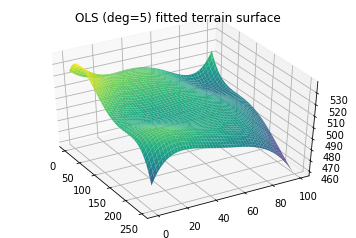

In [13]:
    beta_ls=betareg(x,y,z,5)
    fitted_terrain = np.zeros((num_rows, num_cols))
    for i in range(num_rows):
        y_ = rows[i]
        for j in range(num_cols):
            x_ = cols[j]

            data_vec = np.array([1, x_, y_, x_**2,x_*y_,y_**2 ,  \
                                x_**3, x_**2*y_, x_*y_**2, y_**3, \
                                x_**4, x_**3*y_,x_**2*y_**2, x_*y_**3,y_**4,   \
                                x_**5, x_**4*y_ ,x_**3*y_**2,x_**2*y_**3,x_*y_**4 ,y_**5])# \
                                #x_**6, x_**5*y_, x_**4*y_**2, x_**3*y_**3,x_**2*y_**4,x_*y_**5,y_**6, \
                                #x_**7, x_**6*y_, x_**5*y_**2, x_**4*y_**3,x_**3*y_**4,x_**2*y_**5,x_*y_**6,y_**7, \
                                #x_**8, x_**7*y_, x_**6*y_**2, x_**5*y_**3,x_**4*y_**4,x_**3*y_**5,x_**2*y_**6,x_*y_**7,y_**8, \
                                #x_**9, x_**8*y_, x_**7*y_**2, x_**6*y_**3,x_**5*y_**4,x_**4*y_**5,x_**3*y_**6,x_**2*y_**7,x_*y_**8,y_**9])
            fitted_terrain[i,j] = data_vec @ beta_ls
            

    surface_plot(fitted_terrain,'OLS (deg=5) fitted terrain surface')

    plt.show()

In [14]:
# function predicting the test target values by applying the coefficients gained through the training data

def zpredict_cv(x,y,degree,beta):          
    #input1 : x-vector test
    #input2 : y-vector test
    #input3 : degree of polynomial for fit
    #input4 : beta from training
    #output : predicted values with linear regression coefficients calculated with xtrain,ytrain
    
    Xtrain = designmatrix(x,y,degree)
    zpredict = Xtrain.dot(beta)

    
    return zpredict


In [21]:

import random
#generating random partitions of our data 


# k-crossvalidation, we choose k =10, that means we get 10 partitions
k=10

#generating random order of data points
for j in range(0,len(z)):
    switchindex = random.choice(range(0,len(z)))
    switchvalueX = x[j]
    switchvalueY = y[j]
    switchvalueZ = z[j]
    x[j]=x[switchindex]
    y[j]=y[switchindex]
    z[j]=z[switchindex]
    x[switchindex]=switchvalueX
    y[switchindex]=switchvalueY
    z[switchindex]=switchvalueZ

    
partitionsize = int(len(z)/k)
index = 0

mean_MSE_R2 = np.c_[(np.array([5,7,9]),np.zeros(3),np.zeros(3))]     #Matrix containing average MSE & R2 per degree
#making sure there are zeros in the matrix
for j in range(0,3):
    mean_MSE_R2[j][1]=0
    mean_MSE_R2[j][2]=0


partitionnumber = 1
for k in range(1,k+1):
    print('Partition ',partitionnumber)
    print()
    testx = x[index:index+partitionsize]                                #testdata
    testy = y[index:index+partitionsize]
    testz = z[index:index+partitionsize]
    trainingx =  np.concatenate((x[:index],x[index+partitionsize:]))    #trainingdata
    trainingy =  np.concatenate((y[:index],y[index+partitionsize:]))
    trainingz =  np.concatenate((z[:index],z[index+partitionsize:]))

    for d in range(1,4):
        degree = 3+2*d
        betatrain = betareg(trainingx,trainingy,trainingz,degree)               #regression coefficients
    
        ztestpredict = zpredict_cv(testx,testy,degree,betatrain)                #predicting values for the testset
    
        MSEtest = MSE(testz,ztestpredict)                                       #comparing predicted and real value
        R2scotest = R2score(testz,ztestpredict)
        
        
        print(' degree ',degree)
        print('   MSE   : ',MSEtest)
        print('   R2    : ',R2scotest)
        
        mean_MSE_R2[d-1][1] = mean_MSE_R2[d-1][1]+MSEtest
        mean_MSE_R2[d-1][2] = mean_MSE_R2[d-1][2]+R2scotest
        
    print()
    index = index+partitionsize
    partitionnumber += 1
    
    
print('----------------------------------------------------------------')
print()

Partition  1

 degree  5
   MSE   :  166.5287898388185
   R2    :  0.011850487751598915
 degree  7
   MSE   :  166.39673766426125
   R2    :  0.012634059721384983
 degree  9
   MSE   :  170.49088681985452
   R2    :  -0.011659826609545787

Partition  2

 degree  5
   MSE   :  174.60447007380216
   R2    :  0.008179153785336513
 degree  7
   MSE   :  174.35037652249747
   R2    :  0.009622503322528786
 degree  9
   MSE   :  173.9456623946222
   R2    :  0.01192143592496786

Partition  3

 degree  5
   MSE   :  184.65173453943333
   R2    :  0.012770325221712842
 degree  7
   MSE   :  184.1516755524495
   R2    :  0.015443861283106264
 degree  9
   MSE   :  185.43879823463593
   R2    :  0.008562335311503189

Partition  4

 degree  5
   MSE   :  174.66048847148704
   R2    :  0.007717676541281193
 degree  7
   MSE   :  175.5276017396092
   R2    :  0.002791426901629146
 degree  9
   MSE   :  177.38936463658789
   R2    :  -0.007785632794644615

Partition  5

 degree  5
   MSE   :  173.45

In [22]:

for d in range(1,4):
    mean_MSE_R2[d-1][1] = (mean_MSE_R2[d-1][1])/k
    mean_MSE_R2[d-1][2] = (mean_MSE_R2[d-1][2])/k
print('   MSE & R2 average : ')
print('   degree     MSE      R2')
print(mean_MSE_R2)

   MSE & R2 average : 
   degree     MSE      R2
[[  5.       175.276766   0.009768]
 [  7.       175.244612   0.009948]
 [  9.       176.50903    0.002758]]


In [ ]:
# notice that when testing on test data, the lower degrees perform better!

In [23]:

#control with sklearn

import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
xy=np.c_[x,y]
poly5 = PolynomialFeatures(degree=5)
XY = poly5.fit_transform(xy)
clf5 = LinearRegression()
clf5.fit(XY,z)
a=clf5.intercept_
b=clf5.coef_
b[0]=a
print('skl',b)
print('self',betareg(x,y,z,5))

skl [509.902099   0.179623  -0.368547  -0.002905  -0.003797   0.013533
   0.000008   0.000082  -0.000027  -0.000185   0.        -0.
  -0.         0.000001   0.000001  -0.         0.         0.
  -0.        -0.         0.      ]
self [509.902106   0.179623  -0.368547  -0.002905  -0.003797   0.013533
   0.000008   0.000082  -0.000027  -0.000185   0.        -0.
  -0.         0.000001   0.000001  -0.         0.         0.
  -0.        -0.         0.      ]
